In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import graphviz

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


In [90]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
numeric_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

numeric = houses_df[numeric_columns]
numeric

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [91]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
y = numeric.drop("SalePrice",  axis=1)
X = numeric

random.seed(123)

In [92]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [44]:
# Crear el modelo
regressor = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = regressor.predict(X_test)

minimo = y_pred.min()
print("Valor mínimo: ", minimo)
maximo = y_pred.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y_pred)
print("Desviación estándar: ", std_dev)

varianza = np.var(y_pred)
print("Varianza: ", varianza)

# Calculate MSE and RMSE
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)


Valor mínimo:  0.0
Valor máximo:  53227.0
Desviación estándar:  2118.5640745879664
Varianza:  4488313.738134767
MSE (test): 88777.76587795767
MAE (test): 61.79493565794936
RMSE (test): 297.955979765397


Ahora vamos a comparar diferentes modelos variando la profundidad del árbol de decisión

Comenzamos por el primer modelo, utilizando una profundidad de 4

In [45]:
arbol1 = DecisionTreeRegressor(max_depth=4, random_state=123)
arbol1 = arbol1.fit(X_train, y_train)

In [46]:
y_pred1 = arbol1.predict(X_test)

In [47]:
mse_test = mean_squared_error(y_test, y_pred1)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 145808.2099964514
MAE (test): 119.42167315583173
RMSE (test): 381.84841232673915


Para el segundo modelo le colocamos una profundidad de 8

In [48]:
arbol2 = DecisionTreeRegressor(max_depth=8, random_state=123)
arbol2 = arbol2.fit(X_train, y_train)

In [49]:
y_pred2 = arbol2.predict(X_test)

In [50]:
mse_test = mean_squared_error(y_test, y_pred2)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred2)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 79744.91329545797
MAE (test): 73.66714847621691
RMSE (test): 282.3914185938694


Y por último, para el tercero le colocamos una profundidad de 12

In [51]:
arbol3 = DecisionTreeRegressor(max_depth=12, random_state=123)
arbol3 = arbol3.fit(X_train, y_train)

In [52]:
y_pred3 = arbol3.predict(X_test)

In [53]:
mse_test = mean_squared_error(y_test, y_pred3)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred3)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 62773.02935370547
MAE (test): 62.84201834019187
RMSE (test): 250.5454636462322


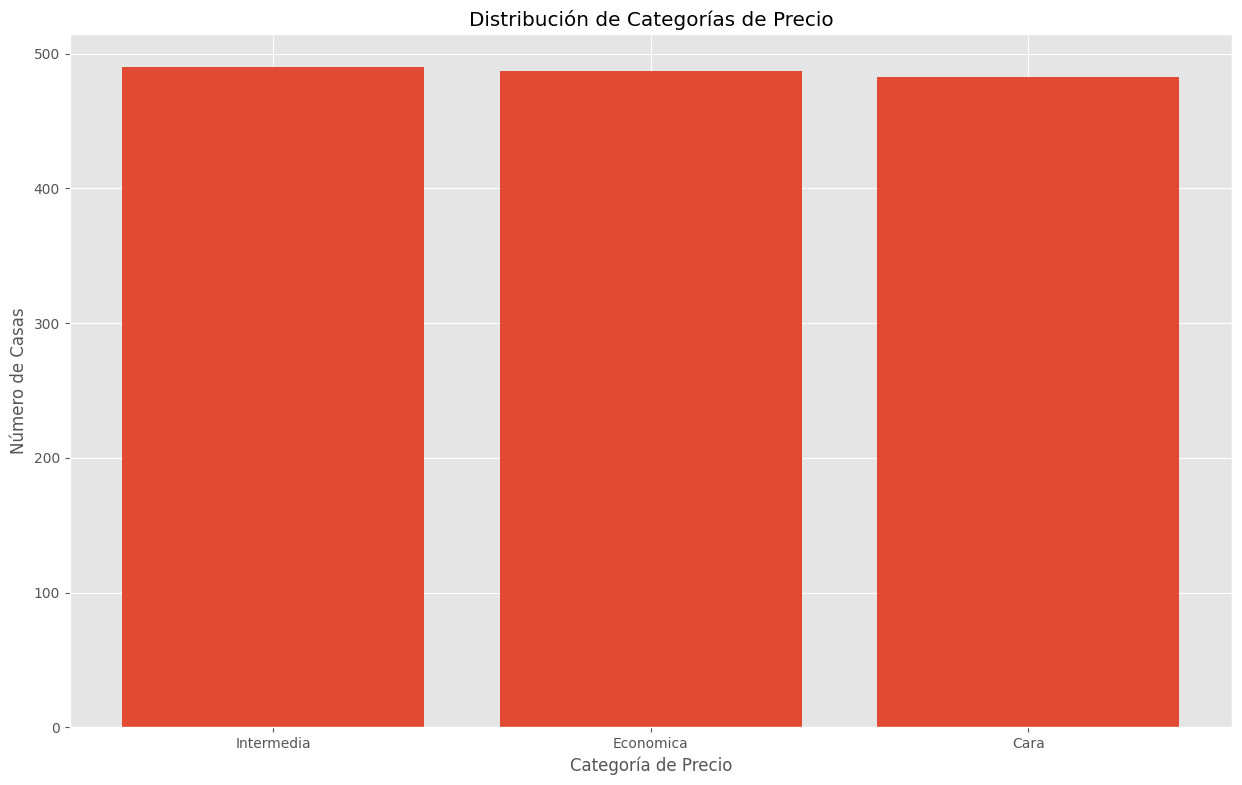

In [79]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [80]:
houses_df['Precio_Categoria'] = houses_df['Precio_Categoria'].astype('category')

In [81]:
houses_df.groupby('Precio_Categoria').size()

/var/folders/fr/spl9qwlx3zz_v90n8qs7s84r0000gn/T/ipykernel_75465/1040900134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  houses_df.groupby('Precio_Categoria').size()


Precio_Categoria
Economica     487
Intermedia    490
Cara          483
dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
y = houses_df.pop('Precio_Categoria')
x = houses_df
random.seed(123)

# Convertir las variables categóricas a una forma numérica
X = pd.get_dummies(X)

# Ahora puedes dividir tus datos y entrenar tu modelo como antes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

# Entrenar un árbol de clasificación
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Graficar el árbol
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['0','1','2'], filled=True)
plt.show()

KeyError: 'Precio_Categoria'

In [58]:
y_pred = clf.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


Matriz de Confusión:
[[ 94   0   0]
 [  0 110   0]
 [  0   0  88]]

Exactitud (Accuracy): 1.00
Precision (Precision): [1. 1. 1.]
Recall (Sensibilidad): [1. 1. 1.]
Puntaje F1: [1. 1. 1.]


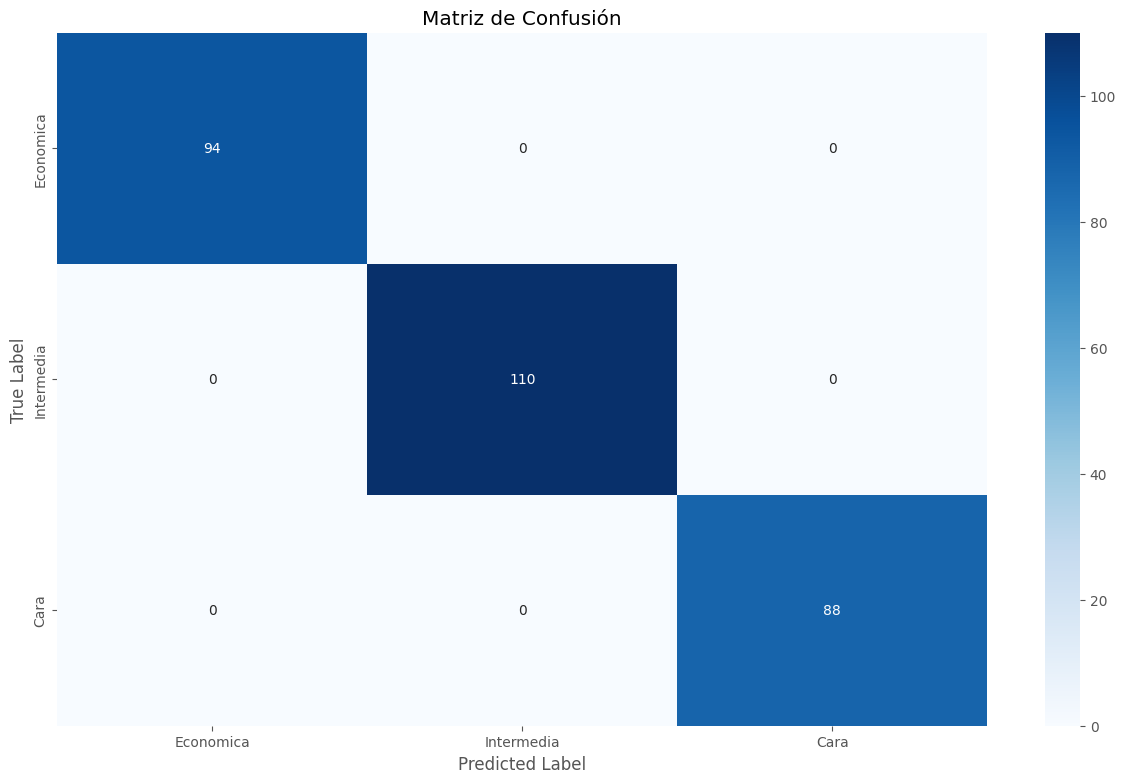

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


# Predecir las etiquetas de clase para los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Imprimir resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nExactitud (Accuracy): {:.2f}".format(accuracy))
print("Precision (Precision): {}".format(precision))
print("Recall (Sensibilidad): {}".format(recall))
print("Puntaje F1: {}".format(f1))

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Economica','Intermedia','Cara'], yticklabels=['Economica','Intermedia','Cara'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [104]:
from sklearn.model_selection import cross_val_score

houses_df = pd.read_csv('train.csv', encoding='latin1')

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
y = houses_df.pop('SalePrice')
X = houses_df

random.seed(123)

# Convertir las variables categóricas a una forma numérica
X = pd.get_dummies(X)

# Ahora puedes dividir tus datos y entrenar tu modelo como antes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)


numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

# Print numerical columns
print("Numerical columns:")
print(numerical_columns)

# Print categorical columns
print("Categorical columns:")
print(categorical_columns)

# Print X_train columns
print("X_train columns:")
print(X_train.columns)

# y_train is a Series, not a DataFrame, so it doesn't have columns. 
# But you can print its name using the .name attribute:
print("y_train name:")
print(y_train)


categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeRegressor())])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo1.fit(X_train,y_train)
modelo1.best_params_


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

KeyError: 'SalesPrice'